In [2]:
import pandas as pd

In [1]:
df = pd.read_csv("../data/train_val_data.csv", encoding="latin1")

NameError: name 'pd' is not defined

In [9]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,61900,54,2,2,4,12,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,24800,49,2,0,4,0,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,443,5885346,9,6,710,3826,517,0,78.888889,172.656773,...,32,292949.0,0.0,292949,292949,5592381.0,0.0,5592381,5592381,BENIGN
3,49738,57,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,80,98306933,6,7,363,11595,345,0,60.500000,139.406958,...,20,14018.0,0.0,14018,14018,98300000.0,0.0,98300000,98300000,DoS Hulk


In [10]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [11]:
df.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 79, dtype: object

In [12]:
df.shape

(79998, 79)

In [13]:
df = df.drop_duplicates()
df = df.dropna()

In [14]:
df.shape

(77340, 79)

In [15]:
# handle infinities

import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()


In [16]:
df.shape

(77305, 79)

In [17]:
# Count rows per class
label_counts = df['Label'].value_counts()
print(label_counts)


BENIGN                      63101
DoS Hulk                     5162
PortScan                     4373
DDoS                         3618
DoS GoldenEye                 291
FTP-Patator                   189
DoS slowloris                 162
DoS Slowhttptest              155
SSH-Patator                   138
Bot                            54
Web Attack � Brute Force       43
Web Attack � XSS               19
Name: Label, dtype: int64


In [18]:
# Percentage of each class
label_percent = df['Label'].value_counts(normalize=True) * 100
print(label_percent)

BENIGN                      81.626027
DoS Hulk                     6.677446
PortScan                     5.656814
DDoS                         4.680163
DoS GoldenEye                0.376431
FTP-Patator                  0.244486
DoS slowloris                0.209560
DoS Slowhttptest             0.200504
SSH-Patator                  0.178514
Bot                          0.069853
Web Attack � Brute Force     0.055624
Web Attack � XSS             0.024578
Name: Label, dtype: float64


In [19]:
# keep only relevant features
import pandas as pd

# Suppose your sampled DataFrame is called df_sample


df_sample = df


# List of features to keep
keep_features = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std',
    'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Down/Up Ratio', 'Average Packet Size',
    'Label'  # Keep the target
]

# Strip column names first to avoid mismatch -> i did it before
df_sample.columns = df_sample.columns.str.strip()

# Keep only the selected columns
df_clean = df_sample[keep_features].copy()

# Optional: check the shape
print("Cleaned DataFrame shape:", df_clean.shape)

# Optional: check class balance
print(df_clean['Label'].value_counts())


Cleaned DataFrame shape: (77305, 45)
BENIGN                      63101
DoS Hulk                     5162
PortScan                     4373
DDoS                         3618
DoS GoldenEye                 291
FTP-Patator                   189
DoS slowloris                 162
DoS Slowhttptest              155
SSH-Patator                   138
Bot                            54
Web Attack � Brute Force       43
Web Attack � XSS               19
Name: Label, dtype: int64


In [31]:
# show percenetge
import pandas as pd

# Suppose df_clean is your cleaned DataFrame
df_clean.columns = df_clean.columns.str.strip()  # just to be sure

# Define rare attacks to combine
rare_attacks = ['Bot', 'Web Attack � Brute Force', 'Web Attack � XSS']

# Create a new column or overwrite Label
df_clean['Label'] = df_clean['Label'].apply(lambda x: 'Other_Attack' if x in rare_attacks else x)

# Check the new class distribution
print(df_clean['Label'].value_counts())


BENIGN              63101
DoS Hulk             5162
PortScan             4373
DDoS                 3618
DoS GoldenEye         291
FTP-Patator           189
DoS slowloris         162
DoS Slowhttptest      155
SSH-Patator           138
Other_Attack          116
Name: Label, dtype: int64


In [32]:
# Count NaNs per column
print(df_clean.isna().sum())

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
FIN Flag Count                 0
SYN Flag C

In [33]:
# Drop columns where >50% values are missing
threshold = 0.5
df_clean = df_clean.loc[:, df_clean.isna().mean() < threshold]


In [34]:
df_clean.shape

(77305, 45)

## train/val split

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Fit and transform the Label column
df_clean['Label'] = le.fit_transform(df_clean['Label'])

# Optional: see the mapping of classes
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

# Check the new class distribution
print(df_clean['Label'].value_counts())


Label mapping: {'BENIGN': 0, 'DDoS': 1, 'DoS GoldenEye': 2, 'DoS Hulk': 3, 'DoS Slowhttptest': 4, 'DoS slowloris': 5, 'FTP-Patator': 6, 'Other_Attack': 7, 'PortScan': 8, 'SSH-Patator': 9}
0    63101
3     5162
8     4373
1     3618
2      291
6      189
5      162
4      155
9      138
7      116
Name: Label, dtype: int64


In [37]:
# X = features, y = target
X = df_clean.drop('Label', axis=1)
y = df_clean['Label']

In [38]:
y

0        0
1        0
2        0
3        0
4        3
        ..
79993    0
79994    0
79995    0
79996    0
79997    8
Name: Label, Length: 77305, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,      # preserves class distribution
    random_state=42
)

print("Train/Val shape:", X_train_val.shape)
print("Test shape:", X_test.shape)

Train/Val shape: (61844, 44)
Test shape: (15461, 44)


In [44]:
X_train = X_train_val
y_train = y_train_val
X_val = X_test
y_val = y_test

## MODELS

zero_division=0 avoids warnings for classes with no predicted samples.

n_estimators=200 is a reasonable starting point; you can increase it for better performance.

Random Forest handles multiclass natively, so no special adjustments are needed.

If your dataset is imbalanced, you may consider adding class_weight='balanced':

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Suppose you have:
# X_train, X_val, y_train, y_val

# 1️⃣ Create the Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=5,    # number of trees
    max_depth=None,      # allow trees to grow fully
    random_state=42,
    n_jobs=-1            # use all cores
)

# 2️⃣ Train the model
rf.fit(X_train, y_train)

# 3️⃣ Predict on validation set
y_val_pred = rf.predict(X_val)

# 4️⃣ Evaluate performance
print("Classification Report:\n")
print(classification_report(y_val, y_val_pred, zero_division=0))

print("Confusion Matrix:\n")
print(pd.DataFrame(confusion_matrix(y_val, y_val_pred), 
                   index=rf.classes_, columns=rf.classes_))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12620
           1       1.00      1.00      1.00       724
           2       0.90      0.95      0.92        58
           3       0.98      0.97      0.98      1032
           4       0.93      0.90      0.92        31
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        38
           7       1.00      0.70      0.82        23
           8       0.99      1.00      1.00       875
           9       1.00      0.71      0.83        28

    accuracy                           0.99     15461
   macro avg       0.98      0.92      0.95     15461
weighted avg       0.99      0.99      0.99     15461

Confusion Matrix:

       0    1   2     3   4   5   6   7    8   9
0  12587    3   5    18   2   0   0   0    5   0
1      2  722   0     0   0   0   0   0    0   0
2      3    0  55     0   0   0   0   0    0   0
3 

High-level summary

Accuracy: 0.99 → extremely high

Weighted avg F1-score: 0.99 → also very high

Macro avg F1-score: 0.95 → slightly lower, which shows some classes are harder

🔹 Observations from the report

Major classes (0, 1, 3, 8)

Precision and recall near 1.0 → model predicts them almost perfectly.

These classes have large support (many samples), so the model learned them well.

Rare classes (2, 4, 7, 9)

F1-scores drop slightly:

Class 2: 0.92

Class 4: 0.92

Class 7: 0.82

Class 9: 0.83

Confusion matrix shows misclassifications mainly from very rare classes being confused with major classes:

Class 7: 7 misclassified as 0

Class 9: 8 misclassified as 0

Perfect predictions: classes 5 and 6 → 100% F1, probably because they are easy to distinguish or less overlapping with other classes.

🔹 Why some classes are harder

Extremely imbalanced dataset → very rare attacks (23–31 samples) are harder to learn.

Random Forest tends to favor classes with more samples, unless class_weight='balanced' is used.

Some attacks might have feature distributions similar to BENIGN or major attacks, causing misclassification.

🔹 Key takeaways

Your model performs very well for common classes (most traffic).

Rare attack detection can improve by:

Using class_weight='balanced' in Random Forest

Oversampling rare attacks (SMOTE, random oversampling)

Using ensemble techniques or specialized rare-class models

Confusion matrix confirms that most errors are rare attacks misclassified as the major class 0 (BENIGN).

### Neural net

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suppose X_train, X_val, X_test are your features
scaler = StandardScaler()

# 1️⃣ Fit only on training data
scaler.fit(X_train)

# 2️⃣ Transform train, validation, and test
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# -----------------------------
# 1️⃣ Convert data to PyTorch tensors
# -----------------------------
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# -----------------------------
# 2️⃣ Define a simple feedforward NN
# -----------------------------
input_size = X_train.shape[1]
num_classes = len(y_train.unique())

class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    def forward(self, x):
        return self.model(x)

model = SimpleNN(input_size, num_classes)

# -----------------------------
# 3️⃣ Define loss and optimizer
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# 4️⃣ Training loop
# -----------------------------
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    val_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_acc:.4f}")


Epoch 1/10, Validation Accuracy: 0.9636
Epoch 2/10, Validation Accuracy: 0.9658
Epoch 3/10, Validation Accuracy: 0.9705
Epoch 4/10, Validation Accuracy: 0.9723
Epoch 5/10, Validation Accuracy: 0.9727
Epoch 6/10, Validation Accuracy: 0.9730
Epoch 7/10, Validation Accuracy: 0.9723
Epoch 8/10, Validation Accuracy: 0.9744
Epoch 9/10, Validation Accuracy: 0.9732
Epoch 10/10, Validation Accuracy: 0.9741


Epoch 1/10, Validation Accuracy: 0.9617
Epoch 2/10, Validation Accuracy: 0.9661
Epoch 3/10, Validation Accuracy: 0.9684
Epoch 4/10, Validation Accuracy: 0.9710
Epoch 5/10, Validation Accuracy: 0.9710
Epoch 6/10, Validation Accuracy: 0.9716
Epoch 7/10, Validation Accuracy: 0.9734
Epoch 8/10, Validation Accuracy: 0.9735
Epoch 9/10, Validation Accuracy: 0.9741
Epoch 10/10, Validation Accuracy: 0.9735

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12620
           1       1.00      0.98      0.99       724
           2       0.86      0.83      0.84        58
           3       0.99      0.89      0.94      1032
           4       0.81      0.84      0.83        31
           5       0.96      0.75      0.84        32
           6       1.00      0.45      0.62        38
           7       0.00      0.00      0.00        23
           8       0.83      1.00      0.90       875
           9       1.00      0.71

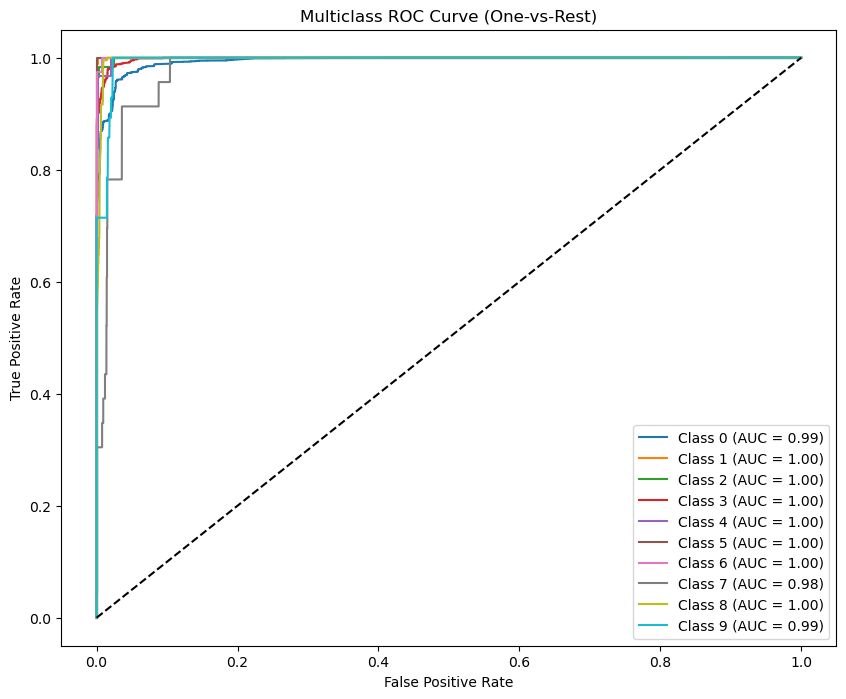

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# 1️⃣ Convert data to PyTorch tensors
# -----------------------------
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# -----------------------------
# 2️⃣ Define simple feedforward NN
# -----------------------------
input_size = X_train.shape[1]
num_classes = len(y_train.unique())

class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    def forward(self, x):
        return self.model(x)

model = SimpleNN(input_size, num_classes)

# -----------------------------
# 3️⃣ Loss and optimizer
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# 4️⃣ Training loop
# -----------------------------
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    # Validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    val_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_acc:.4f}")

# -----------------------------
# 5️⃣ Evaluate on validation set
# -----------------------------
model.eval()
with torch.no_grad():
    y_val_pred_probs = model(X_val_tensor)           # raw logits
    y_val_pred = torch.argmax(y_val_pred_probs, 1)  # predicted class labels

y_val_true = y_val_tensor.numpy()
y_val_pred = y_val_pred.numpy()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_val_true, y_val_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred)
print("\nConfusion Matrix:\n")
print(pd.DataFrame(cm, index=range(num_classes), columns=range(num_classes)))

# -----------------------------
# 6️⃣ ROC curve (One-vs-Rest)
# -----------------------------
# Convert labels to one-hot
y_val_onehot = nn.functional.one_hot(y_val_tensor, num_classes=num_classes).numpy()
y_score = nn.Softmax(dim=1)(y_val_pred_probs).numpy()

plt.figure(figsize=(10,8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_val_onehot[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


Epoch 1/50, Validation Accuracy: 0.9624
Epoch 2/50, Validation Accuracy: 0.9655
Epoch 3/50, Validation Accuracy: 0.9695
Epoch 4/50, Validation Accuracy: 0.9718
Epoch 5/50, Validation Accuracy: 0.9716
Epoch 6/50, Validation Accuracy: 0.9730
Epoch 7/50, Validation Accuracy: 0.9735
Epoch 8/50, Validation Accuracy: 0.9739
Epoch 9/50, Validation Accuracy: 0.9728
Epoch 10/50, Validation Accuracy: 0.9739
Epoch 11/50, Validation Accuracy: 0.9744
Epoch 12/50, Validation Accuracy: 0.9763
Epoch 13/50, Validation Accuracy: 0.9740
Epoch 14/50, Validation Accuracy: 0.9735
Epoch 15/50, Validation Accuracy: 0.9736
Epoch 16/50, Validation Accuracy: 0.9751
Epoch 17/50, Validation Accuracy: 0.9754
Early stopping triggered at epoch 17

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12620
           1       1.00      0.98      0.99       724
           2       0.84      0.93      0.89        58
           3       0.99      0.89

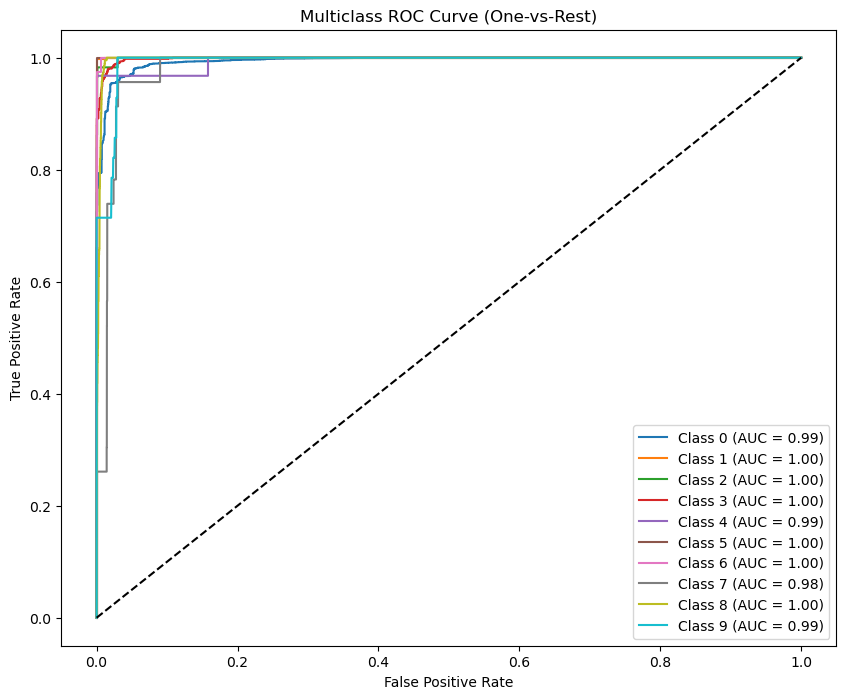

In [49]:
# with early stopping
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import copy

# -----------------------------
# 1️⃣ Convert data to PyTorch tensors
# -----------------------------
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# -----------------------------
# 2️⃣ Define simple feedforward NN
# -----------------------------
input_size = X_train.shape[1]
num_classes = len(y_train.unique())

class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    def forward(self, x):
        return self.model(x)

model = SimpleNN(input_size, num_classes)

# -----------------------------
# 3️⃣ Loss and optimizer
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# 4️⃣ Training loop with Early Stopping
# -----------------------------
num_epochs = 50
patience = 5  # stop if val accuracy does not improve after 5 epochs
best_val_acc = 0
epochs_no_improve = 0
best_model = copy.deepcopy(model.state_dict())

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    val_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_acc:.4f}")
    
    # Early stopping check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# Load the best model
model.load_state_dict(best_model)

# -----------------------------
# 5️⃣ Evaluate on validation set
# -----------------------------
model.eval()
with torch.no_grad():
    y_val_pred_probs = model(X_val_tensor)
    y_val_pred = torch.argmax(y_val_pred_probs, 1)

y_val_true = y_val_tensor.numpy()
y_val_pred = y_val_pred.numpy()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_val_true, y_val_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred)
print("\nConfusion Matrix:\n")
print(pd.DataFrame(cm, index=range(num_classes), columns=range(num_classes)))

# -----------------------------
# 6️⃣ ROC curve (One-vs-Rest)
# -----------------------------
y_val_onehot = nn.functional.one_hot(y_val_tensor, num_classes=num_classes).numpy()
y_score = nn.Softmax(dim=1)(y_val_pred_probs).numpy()

plt.figure(figsize=(10,8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_val_onehot[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


In [50]:
# baseline
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train_scaled, y_train)
y_val_pred = lr.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98     12620
           1       0.99      0.84      0.91       724
           2       0.96      0.76      0.85        58
           3       0.97      0.88      0.92      1032
           4       0.82      0.58      0.68        31
           5       0.68      0.41      0.51        32
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        23
           8       0.80      0.99      0.89       875
           9       0.00      0.00      0.00        28

    accuracy                           0.96     15461
   macro avg       0.62      0.54      0.57     15461
weighted avg       0.96      0.96      0.96     15461



/home/marcos/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# SMOTE for rare cases
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# -----------------------------
# 1️⃣ Split your data (example: X, y are your features and labels)
# -----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X_sampled, y_sampled, test_size=0.2, stratify=y_sampled, random_state=42
)

# -----------------------------
# 2️⃣ Scale features
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# -----------------------------
# 3️⃣ Apply SMOTE only for minority classes
# -----------------------------
# For example, let's upsample classes with < 2000 samples
minority_classes = y_train.value_counts()[y_train.value_counts() < 2000].index.tolist()
sampling_dict = {cls: 2000 for cls in minority_classes}  # generate 2000 samples per rare class

smote = SMOTE(sampling_strategy=sampling_dict, random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

print("Class counts after SMOTE:")
print(pd.Series(y_res).value_counts())

# -----------------------------
# 4️⃣ Convert to PyTorch tensors
# -----------------------------
X_train_tensor = torch.tensor(X_res, dtype=torch.float32)
y_train_tensor = torch.tensor(y_res.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# -----------------------------
# 5️⃣ Define simple NN
# -----------------------------
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))

class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    def forward(self, x):
        return self.model(x)

model = SimpleNN(input_size, num_classes)

# -----------------------------
# 6️⃣ Loss and optimizer with class weights
# -----------------------------
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_res), y=y_res)
class_weights = torch.tensor(class_weights, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# 7️⃣ Training with early stopping
# -----------------------------
num_epochs = 50
patience = 5
best_val_acc = 0
epochs_no_improve = 0
best_model = copy.deepcopy(model.state_dict())

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    val_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = copy.deepcopy(model.state_dict())
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

model.load_state_dict(best_model)

# -----------------------------
# 8️⃣ Evaluate
# -----------------------------
model.eval()
with torch.no_grad():
    y_val_pred_probs = model(X_val_tensor)
    y_val_pred = torch.argmax(y_val_pred_probs, 1)

y_val_true = y_val_tensor.numpy()
y_val_pred = y_val_pred.numpy()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_val_true, y_val_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred)
print("\nConfusion Matrix:\n")
print(pd.DataFrame(cm, index=np.unique(y_val), columns=np.unique(y_val)))

# ROC curve (One-vs-Rest)
y_val_onehot = nn.functional.one_hot(y_val_tensor, num_classes=num_classes).numpy()
y_score = nn.Softmax(dim=1)(y_val_pred_probs).numpy()

plt.figure(figsize=(10,8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_val_onehot[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


NameError: name 'X_sampled' is not defined

In [ ]:
# then simulate new data!!!!!!!!!!!!

In [ ]:
# Ensemble!!!